In [1]:
# Run this to ensure TensorFlow 2.x is used
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
    pass

In [2]:
import tensorflow as tf
print(tf.__version__)

2.0.0


In [3]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/john/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

In [5]:

#Most frequent 5000 words in the dataset
vocab_size = 5000
embedding_dim = 64
max_length = 200
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_portion = .8

In [6]:
articles = []
labelsList = []

#raw_data = pd.read_csv('/content/drive/My Drive/new_transaction.csv')

with open("isear.csv", 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        
        labelsList.append(row[0])
        article = row[0]
        for word in STOPWORDS:
            token = ' ' + word + ' '
            article = article.replace(token, ' ')
            article = article.replace(' ', ' ')
        articles.append(article)
print(len(labelsList))
print(len(articles))

7666
7666


In [53]:

#read the first dataset
import pandas as pd

data = pd.read_csv("isear.csv", delimiter="|" , error_bad_lines=False)

df2 = data.loc[:,'Field1':'SIT']
df2 = df2.drop(['Field3', 'Field2', 'MYKEY'], axis = 1)
#df2.head()

emotion_list = df2['Field1'].tolist()
sentence_list = df2['SIT'].tolist()
#Field1 to emotionlist, SIT to sentenceList, 

print(len(sentence_list))
#articless = []

# for each sentence in sentence list, I wnat to check if it contains a stopword, if yes replace the word with ' '
#for sentence in sentence_list:
 #   for word in STOPWORDS:
  #      token = ' ' + word + ' '
   #     sentence = sentence.replace(token, ' ')
    #    sentence = sentence.replace(' ', ' ')
    #sentence_list.append(sentence) 

#print(len(sentence_list))

print(sentence_list[0:3])

7503
['During the period of falling in love, each time that we met and á especially when we had not met for a long time.', 'When I was involved in a traffic accident.', 'When I was driving home after  several days of hard work, there á was a motorist ahead of me who was driving at 50 km/hour and á refused, despite his low speeed to let me overtake.']


b'Skipping line 199: expected 43 fields, saw 44\nSkipping line 222: expected 43 fields, saw 44\nSkipping line 248: expected 43 fields, saw 44\nSkipping line 350: expected 43 fields, saw 44\nSkipping line 395: expected 43 fields, saw 44\nSkipping line 423: expected 43 fields, saw 44\nSkipping line 480: expected 43 fields, saw 44\nSkipping line 552: expected 43 fields, saw 44\nSkipping line 601: expected 43 fields, saw 45\nSkipping line 604: expected 43 fields, saw 45\nSkipping line 612: expected 43 fields, saw 45\nSkipping line 722: expected 43 fields, saw 44\nSkipping line 765: expected 43 fields, saw 44\nSkipping line 800: expected 43 fields, saw 46\nSkipping line 818: expected 43 fields, saw 45\nSkipping line 891: expected 43 fields, saw 44\nSkipping line 928: expected 43 fields, saw 44\nSkipping line 963: expected 43 fields, saw 44\nSkipping line 965: expected 43 fields, saw 45\nSkipping line 974: expected 43 fields, saw 44\nSkipping line 985: expected 43 fields, saw 44\nSkipping li

In [54]:
#Read the second dataset

data2 = pd.read_csv("text_emotion.csv")
emotion_list2 = data2['sentiment'].tolist()
sentence_list2 = data2['content'].tolist()

emotion_list2_unique = data2['sentiment'].unique().tolist()


sentence_list2 = [hash_tag_removerr(word) for word in sentence_list2 ]

final_emotion_list = emotion_list + emotion_list2
final_sentence_list = sentence_list + sentence_list2
#emotion_list.extend(emotion_list2)
#sentence_list.extend(sentence_list2)
print(len(final_emotion_list))
print(len(final_sentence_list))

#If first character =="@"
#Delete up to the first " "

47503
47503


In [11]:
import re

def hash_tag_remover(input):
    regexObject = re.compile(r"\W+\w+")
    matchObject = regexObject.findall(input)

    needed = [item for item in matchObject if item.startswith("@") is False and item.startswith(" @") is False]

    result = "". join(needed).strip(" ")
    return result 

result = hash_tag_remover("@LadyRedCrest @miss_hazy  Have safe trips! And Indy is my home")

print(result)

Have safe trips! And Indy is my home


In [12]:
def hash_tag_removerr(input):
	input_to_list = input.split(" ")
	input_to_list.pop(0)

	needed = [item for item in input_to_list if not item.startswith("@")]
			
	result = " ". join(needed).strip(" ")
	return result 

result = hash_tag_removerr(",(@wendyisastar) @paul Umm yeah. That's probably a pretty good note to self because eeeeeewwwwwwww.")

print(result)

Umm yeah. That's probably a pretty good note to self because eeeeeewwwwwwww.


In [13]:
def cleanup(sentence):
	'''Function that cleans up a sentence with words starting with @'''
	
	wordlist = sentence.split()
	new_sen  = [word for word in wordlist if word[0] != '@']
			
	return " ".join(new_sen)
				
print(cleanup("@LadyRedCrest @miss_hazy  Have safe trips! And Indy is my home"))

Have safe trips! And Indy is my home


In [55]:
for word in STOPWORDS:
    token = ' ' + word + ' '
    res = list(map(lambda token: str.replace(token, ' ', ' '), final_sentence_list))
print(res[0:3])

['During the period of falling in love, each time that we met and á especially when we had not met for a long time.', 'When I was involved in a traffic accident.', 'When I was driving home after  several days of hard work, there á was a motorist ahead of me who was driving at 50 km/hour and á refused, despite his low speeed to let me overtake.']


In [63]:
sentenceFiltered = []
for w in final_sentence_list:
    if w not in STOPWORDS:
        sentenceFiltered.append(w)
    else:
        #print(sentence_list2.index(w))
        final_emotion_list.pop(final_sentence_list.index(w))
len(sentenceFiltered)

47484

In [132]:
df1 = pd.DataFrame(xx, columns=["emotions"])
df2 = pd.DataFrame(sentenceFiltered, columns=["sentences"])
df_row = pd.concat([df1, df2], axis=1)
df_row.to_csv('new_data.csv', index=False)

df_row.head()

,emotions,sentences
0,0,"During the period of falling in love, each tim..."
1,1,When I was involved in a traffic accident.
2,2,When I was driving home after several days of...
3,3,When I lost the person who meant the most to me.
4,4,The time I knocked a deer down - the sight of ...


In [133]:
print(len(final_emotion_list))
print(len(sentenceFiltered))

47484
47484


In [66]:
print(final_emotion_list[0:10])

['joy', 'fear', 'anger', 'sadness', 'disgust', 'shame', 'guilt', 'joy', 'fear', 'anger']


In [67]:
data = {'joy':0, 'fear':1, 'anger':2, 'sadness':3, 'disgust':4, 'shame':5, 'guilt':6, 'empty':7,
       'enthusiasm':8, 'neutral':9, 'worry':10, 'surprise':11, 'love':12, 'fun':13, 'hate':14, 'happiness':15,
       'boredom':16, 'relief':17}

xx = [data[item] for item in final_emotion_list]

print(xx)
labelsTensor1 = tf.Variable(xx, tf.int32)
ys1 = tf.one_hot(labelsTensor1, 18)
print(ys1)

print(data)

[0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 

In [68]:
train_size = int(len(sentenceFiltered) * training_portion)


train_articles = sentenceFiltered[0: train_size]
train_labels = ys1[0: train_size]

validation_articles = sentenceFiltered[train_size:]
validation_labels = ys1[train_size:]

print(train_size)
print(len(train_articles))
print(len(train_labels))
print(len(validation_articles))
print(len(validation_labels))

37987
37987
37987
9497
9497


In [69]:
print(validation_labels.shape)

(9497, 18)


In [70]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_articles)
word_index = tokenizer.word_index

In [71]:
train_sequences = tokenizer.texts_to_sequences(train_articles)
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [72]:
validation_sequences = tokenizer.texts_to_sequences(validation_articles)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(len(validation_sequences))
print(validation_padded.shape)

9497
(9497, 200)


In [73]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_article(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])
print(decode_article(train_padded[10]))
print('---')
print(train_articles[10])

when my friends did not ask me to go to a new year's party á with them ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
---
When my friends did not ask me to go to a New Year's party á with them.


In [36]:
model = tf.keras.Sequential([
    # Add an Embedding layer expecting input vocab of size 5000, and output embedding dimension of size 64 we set at the top
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
#    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    # use ReLU in place of tanh function since they are very good alternatives of each other.
    tf.keras.layers.Dense(embedding_dim, activation='relu'),
    # Add a Dense layer with 5 units and softmax activation.
    # When we have multiple outputs, softmax convert outputs layers into a probability distribution.
    tf.keras.layers.Dense(18, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          320000    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 18)                1170      
Total params: 395,474
Trainable params: 395,474
Non-trainable params: 0
_________________________________________________________________


In [50]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [51]:
num_epochs = 10
history = model.fit(train_padded, train_labels, epochs=num_epochs, validation_data=(validation_padded, validation_labels), verbose=2)

ValueError: Data cardinality is ambiguous:
  x sizes: 9500
  y sizes: 9504
Please provide data which shares the same first dimension.

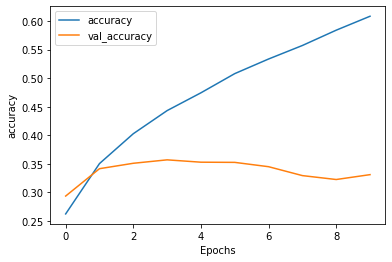

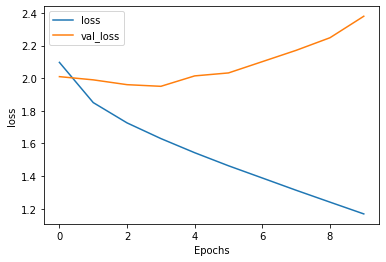

In [65]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [66]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(18, activation='sigmoid')
])


model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 200, 64)           320000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 24)                1560      
_________________________________________________________________
dense_5 (Dense)              (None, 18)                450       
Total params: 322,010
Trainable params: 322,010
Non-trainable params: 0
_________________________________________________________________


In [67]:
num_epochs = 10
history2 = model2.fit(train_padded, train_labels, epochs=num_epochs, validation_data=(validation_padded, validation_labels), verbose=2)

Train on 38002 samples, validate on 9501 samples
Epoch 1/10
38002/38002 - 8s - loss: 0.2190 - accuracy: 0.9380 - val_loss: 0.1920 - val_accuracy: 0.9444
Epoch 2/10
38002/38002 - 7s - loss: 0.1836 - accuracy: 0.9443 - val_loss: 0.1864 - val_accuracy: 0.9444
Epoch 3/10
38002/38002 - 7s - loss: 0.1764 - accuracy: 0.9441 - val_loss: 0.1900 - val_accuracy: 0.9444
Epoch 4/10
38002/38002 - 7s - loss: 0.1730 - accuracy: 0.9442 - val_loss: 0.1859 - val_accuracy: 0.9444
Epoch 5/10
38002/38002 - 8s - loss: 0.1694 - accuracy: 0.9444 - val_loss: 0.1778 - val_accuracy: 0.9444
Epoch 6/10
38002/38002 - 10s - loss: 0.1658 - accuracy: 0.9444 - val_loss: 0.1758 - val_accuracy: 0.9444
Epoch 7/10
38002/38002 - 9s - loss: 0.1626 - accuracy: 0.9444 - val_loss: 0.1691 - val_accuracy: 0.9443
Epoch 8/10
38002/38002 - 10s - loss: 0.1602 - accuracy: 0.9444 - val_loss: 0.1699 - val_accuracy: 0.9443
Epoch 9/10
38002/38002 - 10s - loss: 0.1582 - accuracy: 0.9444 - val_loss: 0.1675 - val_accuracy: 0.9443
Epoch 10/10


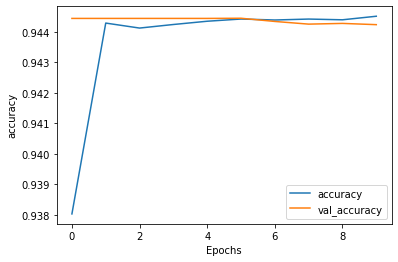

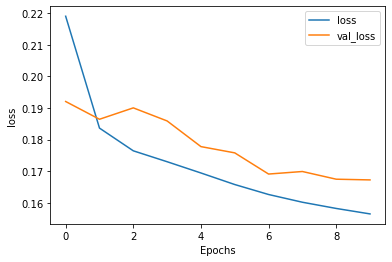

In [68]:
plot_graphs(history2, "accuracy")
plot_graphs(history2, "loss")

In [75]:
txt = ["Remained faithful to his mother"]
seq = tokenizer.texts_to_sequences(txt)
padded = pad_sequences(seq, maxlen=max_length)
pred = model.predict(padded)
pred2 = model2.predict(padded)
#labelss = {'joy':0, 'fear':1, 'anger':2, 'sadness':3, 'disgust':4, 'shame':5, 'guilt':6, 'empty':7,
       #'enthusiasm':8, 'neutral':9, 'worry':10, 'surprise':11, 'love':12, 'fun':13, 'hate':14, 'happiness':15,
       #'boredom':16, 'relief':17}
#Do I get the sequence that generates this?
new_data ={j:i for i, j in data.items()}
print(pred, new_data[int(pred.argmax(1))])
print(pred2, new_data[int(pred2.argmax(1))])

[[0.04340801 0.05470611 0.03820225 0.07128341 0.02209738 0.03538162
  0.03220103 0.05618338 0.00748916 0.39333597 0.07755365 0.02160462
  0.06112031 0.00492314 0.01472254 0.02916925 0.00290086 0.0337173 ]] neutral
[[0.02974531 0.02767742 0.03909057 0.14413643 0.02955809 0.0278891
  0.02516538 0.01858976 0.00478339 0.13305259 0.08268887 0.0228425
  0.01081133 0.00601062 0.02048054 0.0157263  0.00315039 0.01156415]] sadness


In [41]:
import tensorflow_hub as hub
from tensorflow.keras.models import Model

In [42]:
from bert.tokenization.bert_tokenization import FullTokenizer

In [43]:
max_seq_length = 128  # Your choice here.
input_word_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                       name="input_word_ids")
input_mask = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                   name="input_mask")
segment_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                    name="segment_ids")
bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2",
                            trainable=True)
pooled_output, sequence_output = bert_layer([input_word_ids, input_mask, segment_ids])

In [79]:
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = FullTokenizer(vocab_file, do_lower_case)

In [80]:

def get_masks(tokens, max_seq_length):
    """Mask for padding"""
    if len(tokens)>max_seq_length:
        raise IndexError("Token length more than max seq length!")
    return [1]*len(tokens) + [0] * (max_seq_length - len(tokens))


def get_segments(tokens, max_seq_length):
    """Segments: 0 for the first sequence, 1 for the second"""
    if len(tokens)>max_seq_length:
        raise IndexError("Token length more than max seq length!")
    segments = []
    current_segment_id = 0
    for token in tokens:
        segments.append(current_segment_id)
        if token == "[SEP]":
            current_segment_id = 1
    return segments + [0] * (max_seq_length - len(tokens))


def get_ids(tokens, tokenizer, max_seq_length):
    """Token ids from Tokenizer vocab"""
    token_ids = tokenizer.convert_tokens_to_ids(tokens)
    input_ids = token_ids + [0] * (max_seq_length-len(token_ids))
    return input_ids

In [81]:
s = "This is a nice sentence."
stokens = tokenizer.tokenize(s)
stokens = ["[CLS]"] + stokens + ["[SEP]"]

input_ids = get_ids(stokens, tokenizer, max_seq_length)
input_masks = get_masks(stokens, max_seq_length)
input_segments = get_segments(stokens, max_seq_length)

#pool_embs, all_embs = model.predict([[input_ids],[input_masks],[input_segments]])


In [94]:
#TESTING
max_seq_length = 512  # Your choice here.

s1 = "He is going to work"
stokens1 = tokenizer.tokenize(s1)
stokens1 = ["[CLS]"] + stokens1 + ["[SEP]"]

input_ids1 = get_ids(stokens1, tokenizer, max_seq_length)
input_masks1 = get_masks(stokens1, max_seq_length)
input_segments1 = get_segments(stokens1, max_seq_length)

print("IDS # len:" , len(input_ids1), " ::: ",input_ids1)
print("MASKS # len:" , len(input_masks1), " ::: ",input_masks1)
print("SEGEMNTS # len:" , len(input_segments1), " ::: ",input_segments1)

IDS # len: 512  :::  [101, 2002, 2003, 2183, 2000, 2147, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [138]:

input_word_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                       name="input_word_ids")
input_mask = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                   name="input_mask")
segment_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                    name="segment_ids")
bert_inputs = [input_word_ids, input_mask, segment_ids]

pooled_output, _ = bert_layer(bert_inputs) 

dense = tf.keras.layers.Dense(256, activation='relu')(pooled_output)

pred = tf.keras.layers.Dense(17, activation='softmax')(dense)

model = Model(inputs=bert_inputs, outputs=pred)

In [139]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_word_ids (InputLayer)     [(None, 512)]        0                                            
__________________________________________________________________________________________________
input_mask (InputLayer)         [(None, 512)]        0                                            
__________________________________________________________________________________________________
segment_ids (InputLayer)        [(None, 512)]        0                                            
__________________________________________________________________________________________________
keras_layer (KerasLayer)        multiple             109482241   input_word_ids[0][0]             
                                                                 input_mask[0][0]           

In [140]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [141]:
def prep(s, get = 'id'):
    stokens = tokenizer.tokenize(s)
    stokens = ["[CLS]"] + stokens + ["[SEP]"]
    if get == 'id':
        input_ids = get_ids(stokens, tokenizer, max_seq_length)
        return input_ids
    elif get == 'mask':
        input_masks = get_masks(stokens, max_seq_length)
        return input_masks
    else:
        input_segments = get_segments(stokens, max_seq_length)
        return input_segments

In [142]:
daf = pd.read_csv("new_data.csv")
daf = daf.dropna()
print(daf)
daf.isnull().sum().sum()

       emotions                                          sentences
0             0  During the period of falling in love, each tim...
1             1         When I was involved in a traffic accident.
2             2  When I was driving home after  several days of...
3             3  When I lost the person who meant the most to me. 
4             4  The time I knocked a deer down - the sight of ...
...         ...                                                ...
47478        15                                  following Tayla!!
47480        12                           Mothers Day  All my love
47481        12  Mother's Day to all the mommies out there, be ...
47482        15  WASSUP BEAUTIFUL!!! FOLLOW ME!!  PEEP OUT MY N...
47483        12  bullet train from tokyo    the gf and i have b...

[47315 rows x 2 columns]


0

In [126]:

INPUT_IDS = list(daf['sentences'].apply(lambda x: prep(x, get = 'id')))

INPUT_IDS = np.array(INPUT_IDS)

In [127]:
INPUT_MASKS = list(daf['sentences'].apply(lambda x: prep(x, get = 'mask')))

INPUT_MASKS = np.array(INPUT_MASKS)

In [128]:
INPUT_SEGS = list(daf['sentences'].apply(lambda x: prep(x, get = 'seg')))

INPUT_SEGS = np.array(INPUT_SEGS)

In [135]:
em_lis = np.array(daf['emotions'])


In [136]:
type(em_lis)

numpy.ndarray

In [144]:

model.fit([INPUT_IDS,INPUT_MASKS,INPUT_SEGS], em_lis, epochs=3)

Train on 47315 samples
Epoch 1/3
   32/47315 [..............................] - ETA: 119:56:03

NotFoundError:  [_Derived_]No gradient defined for op: StatefulPartitionedCall
	 [[{{node Func/_4}}]]
	 [[PartitionedCall/gradients/StatefulPartitionedCall_grad/PartitionedCall/gradients/StatefulPartitionedCall_grad/SymbolicGradient]] [Op:__inference_distributed_function_38997]

Function call stack:
distributed_function
